### Python module 3. **pandas**

# Using pandas

* [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas tutorial with interactive exercises](https://www.kaggle.com/pistak/pandas-tutorial-with-interactive-exercises)

In [0]:
import pandas as pd   #pandas사용하기위해서는 무조건 아래 3줄사용
import numpy as np    #
import matplotlib.pyplot as plt #
%matplotlib inline

## [1] Make data: Series, and DataFrame
> pandas의 데이터 구조
- Series
- DataFrame

##R이라는 통계 프로그램에서 기본 데이터 구조 
##dataFrame = df 사용 -> pandas에서 사용

### Series
> 1차원 데이터

In [0]:
# Creating a Series by passing a list of values
s = pd.Series([1,3,5,np.nan,6,8])  # pandas = pd  / 숫자 5개와 np.nan ( not a number )
s

In [0]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20191129', periods=6) # 주기6으로 20191129부터 6일동안의 1차원 시리즈를 만듬
dates

In [0]:
# Make dataframe using an array with random numbers
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD')) # 6행 3열형식으로 / index에 위에서 저장된 dates날짜저장 / columns -> 각 행의 열이름
df

In [0]:
# check types of df  --> same type
df.dtypes # 각 행과 열의 타입확인

### 데이터프레임 (DataFrame)
- 2차원 데이터
- 다차원 데이터

In [0]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like. # A~F 까지의 열이름 /
df2 = pd.DataFrame({ 'A' : 1., 
                    'B' : pd.Timestamp('20191129'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),  
                    'D' : np.array([3] * 4,dtype='int32'), # 3을 4번 반복
                    'E' : pd.Categorical(["test","train","test","train"]), 
                    'F' : 'foo' })

In [0]:
df2

In [0]:
# check types of df2 --> different types
df2.dtypes



---



## [2] Handling data
- head()
- tail()
- describe()

In [0]:
# head()
# df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df.head() # 디폴트값은 5개

In [0]:
df.head(2)

In [0]:
df.tail(3)

In [0]:
# Display the index, columns, and the underlying NumPy data:
df.index

In [0]:
# describe() shows a quick statistic summary of your data:
df.describe()

In [0]:
df.columns

In [0]:
df2.describe() # 숫자만 가능한 describe()

In [0]:
# Transposing your dataframe:
df.T #행과 열을 반대로

### Sorting

#### Sort by index
- sort_index(axis=0, ascending=False)
- sort_index(axis=1, ascending=False)

In [0]:
# Sorting by an axis:
df, df.sort_index(axis=0, ascending=False)  # axis 0은 행 1은 열 / ascending 이 false면 순서 반대로

In [0]:
df,df.sort_index(axis=1, ascending=False)

#### Sort by value
- sort_values(by='column')

In [0]:
df

In [0]:
# Sorting by values:
df.sort_values(by='B' , ascending=False) # B열만 처리함

#### Selecting data by indexing and slicing
- indexing
- slicing


In [0]:
# Selecting a single column, which yields a Series
df['A']

In [0]:
# Selecting via [], which slices the rows.
df[0:3] # ->첫날부터 3일

In [0]:
df['20191129':'20191201'] # 인덱스가 아닌 값인 경우는 지정된 범위가 다 선택된다. / pandas에서는 값으로 범위 지정하면 그 값까지 출력

#### Selecting data by label

> **loc, iloc**


In [0]:
df

In [0]:
df.loc[dates[0]]   # loc() -> 첫번째 날에 있는 데이터를 뽑아준다

In [0]:
# Selecting on a multi-axis by label:
df.loc[:,['A','B']] # 전체 행에 대해서 A,B열만 

#### [도전코딩]

> Select data for first two days AND comumn 3,4 from df.

In [0]:
#df.loc[0:2,['C','D']] # loc은 인덱스값으로는 오류
#df.loc['20191129':'20191130',['C','D']]
#df.loc[dates[:2],['C','D']]

#### Selecting data by position (iloc())

In [0]:
df

In [0]:
df.iloc[3]  # 결과는 차원축소형으로 표현됨. / iloc은 인덱스로 가능

In [0]:
# [다시 도전]
# Select data for first two days AND comumn 3,4 from df.
# Use iloc
df.iloc[:2,2:4] 

In [0]:
# Select one item
df.iloc[1,1]

#### Selecting data by Boolean indexing

In [0]:
df

In [0]:
df[df.A > 0] # df.A -> dataframe에있는 A에 있는 값중에 0보다 큰 값만 출력

In [0]:
df[df > 0] # 0보다 큰 수는 출력되고 0보다 작은 수는 구조를 유지하기위해 NaN으로 표현 

### 데이터 재구성(setting) 또는 확장

In [0]:
# Setting a new column automatically aligns the data by the indexes.
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20191129', periods=6))
s1

In [0]:
df

In [0]:
df['F'] = s1 # df에 F열에 위에서 만든 s1을 추가

In [0]:
df  # 기존 df의 구조에 맞춰서 확장, 재구성됨.

#### Setting data by label

> **at, iat**

In [0]:
# Setting values by label:
df.at[dates[0],'A'] = 0  # at -> 첫번째 행의 A열의 값을 0으로 재구성
df

In [0]:
# Setting values by position (index):
df.iat[0,1] = 0 # iat -> 인덱스 사용 / 첫번째 행의 2번째 열의 값을 0으로
df

In [0]:
len(df), df.shape, df.size

In [0]:
# Setting by assigning with a NumPy array: 시험문제???
df.loc[:,'D'] = np.array([5] * len(df)) # 현재 df에서 D열을 5로 다 바꿔준다
df

### Missing data 처리
- pandas primarily uses the value **np.nan** to represent missing data. 
- dropna()
- fillna()

In [0]:
df.columns

In [0]:
df

In [0]:
df.columns

In [0]:
# Reindexing allows you to change/add/delete the index on a specified axis.
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E']) # 새로운 df1을 만듬, reindex를 사용해서 처음부터 4일간만, columns에 값이 없는 E 추가
df1

In [0]:
df1.loc[dates[0]:dates[1],'E'] = 1
df1

In [0]:
# To drop any rows that have missing data.
df1.dropna(how='any') # NaN이 있는 행을 날린다.

In [0]:
# Filling missing data.
df1.fillna(value=5) # NaN에 5

In [0]:
# Get the boolean mask where values are nan.
pd.isna(df1)



---



### 데이터 통계 (Statistics)

In [0]:
df

In [0]:
df.mean()

In [0]:
df.mean(0) # 0는 axis 0(세로로 평균))

In [0]:
df.mean(1) # 1은 가로로 평균

In [0]:
df.std(0)

#### [도전] 데이터프레임 df의 평균(mean(0))과 표준편차를 이용한 그래프
- 평균에 대한 꺽은선그래프
- 평균과 표준편차를 이용한 막대그래프
> x-축은 A,B,C,D,E

In [0]:
import numpy as np
import matplotlib.pyplot as plt
# 노트북 셀 내에 그림 출력
%matplotlib inline

In [0]:
# 막대그래프(bar graph)를 그린다.
means = [1, 2, 3]
stddevs = [0.2, 0.4, 0.5]
bar_labels = ['bar 1', 'bar 2', 'bar 3']

# plot bars
x_pos = list(range(len(bar_labels)))
plt.bar(x_pos, means, yerr=stddevs)

plt.show()

In [82]:
df

,A,B,C,D,F
2019-11-29,0.000000,0.000000,0.139491,5,1
2019-11-30,0.709208,0.360922,0.849087,5,2
2019-12-01,-0.557755,-1.083100,0.166033,5,3
2019-12-02,1.526073,-0.080887,-0.430781,5,4
2019-12-03,-0.633012,-0.970953,-1.773921,5,5
2019-12-04,0.655262,-0.074014,0.555137,5,6


In [0]:
plt.plot(df.mean(0), '-o', ms=8) # mean(0) -> 위에서 아래로 내려가면서 평균을 내줌

In [0]:
# df의 평균(mean(0))과 표준편차를 이용한 바그래프
bar_labels = df.columns # 가로축
# plot bars
plt.bar(bar_labels, df.mean(0), yerr=df.std(0))

***

## pandas의 데이터 시각화

In [0]:
df

### 꺽은선 그래프

In [0]:
df['A'].plot(marker='o', c='r', ms=8) # df의 A열의 값을/ c는 color

In [0]:
df['F'].plot(marker='o', c='r', ms=8)

In [0]:
df.plot(y='F', marker='o', c='r', ms=8)   # x-축은 날짜인덱스, y축은 F값

In [0]:
# 두 개의 그래프를 한 축에 그리기
df['A','F'].plot(marker='o', c='r', ms=8)  # 두개를 그릴 때 이 방식은 에러남

In [0]:
df.plot(y=['A','C','F'], marker='o')

### 산포도 (Scatter graph)

In [0]:
df.plot(kind='scatter',x='F',y='A', color='r', marker='o', s=32)  # kind -> 그래프의 유형 /x축은 F, y축은 A

In [0]:
df.plot(kind='scatter',x='B',y='C', color='blue', marker='d', s=50)  # marker='d' -> 다이아몬드 모양

### 바 그래프

In [0]:
df['A'].plot.bar()

In [0]:
df['F'].plot.bar()

In [0]:
df.plot(kind='bar', y='F')

#### 다중 바그래프

In [0]:
df.plot(kind='bar',y=['A','C','F'])

#### 평균/표준편차 그래프

In [0]:
df.mean(0), df.std(0), df.columns  # A~B까지의 평균과 표준편차

In [0]:
# plot bars
# bar_labels = df.columns
# plt.bar(bar_labels, df.mean(0), yerr=df.std(0))
df.mean(0).plot.bar(yerr=df.std(0), rot=0)  # rot=0 -> 가로축의 문자를 똑바로 세워준다



---



### 그래프 이어 그리기

In [0]:
x1 = np.arange(0.0, 5.0, 0.01) # 0부터 5까지 0.01 간격으로 
y1 = np.sin(2*np.pi*x1)
plt.figure(figsize=(10,4))
plt.plot(x1, y1, 'o', ms = 4)

In [0]:
x1.shape, y1.shape

#### pandas 데이터프레임을 이용한 그래프 

In [0]:
df = pd.DataFrame(dict(sine=y1), index=x1, columns=['sine']) # index -> 0부터 5까지 0.01 간격으로 만들어진 값
df.head()

In [0]:
df.tail()

In [109]:
len(df)

500

In [0]:
pre_size = int(len(df) * 0.8)
post_size = len(df) - pre_size
pre, post = df.iloc[0:pre_size], df.iloc[pre_size:len(df)] # 초반 80% , 후반 80%
print(len(pre), len(post))

In [0]:
post.shape

In [0]:
post2 = post + np.random.normal(scale=0.2, size=len(post)).reshape(-1,1)

In [0]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(0, len(pre)), pre, 'g', label="pre")
plt.plot(np.arange(len(pre), len(pre) + len(post)), post, 'b', marker='.', label="post")
plt.plot(np.arange(len(pre), len(pre) + len(post)), post2, 'r', label="post2")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

#### post  post2를 동시에 그려서 두 그래프를 비교해보시오. 

In [0]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(pre), len(pre) + len(post)), post, 'b', marker='.', label="post")
plt.plot(np.arange(len(pre), len(pre) + len(post)), post2, 'r', label="post2")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

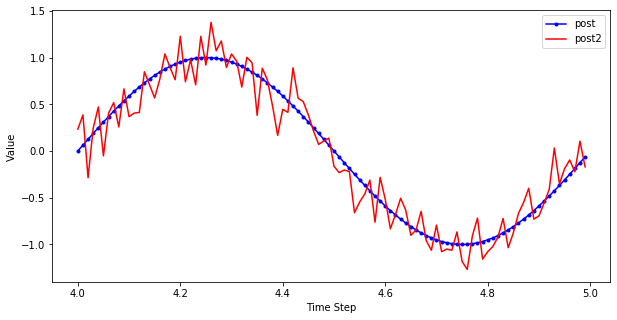

In [116]:
plt.figure(figsize=(10,5))
plt.plot(post, 'b', marker='.', label="post")
plt.plot(post2, 'r', label="post2")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

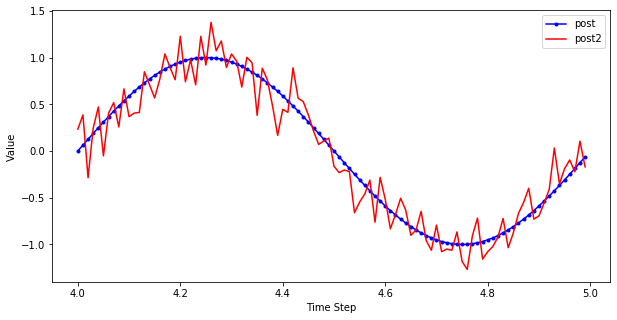

In [117]:
plt.figure(figsize=(10,5))
plt.plot(post, 'b', marker='.', label="post")
plt.plot(post2, 'r', label="post2")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();